In [80]:
import numpy as np
import pandas as pd
import opendatasets as od
from tensorflow import keras
from keras.models import Model
from keras.layers import Input,Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
od.download("https://www.kaggle.com/datasets/vikrishnan/boston-house-prices")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle Key:Downloading boston-house-prices.zip to .\boston-house-prices


100%|██████████| 12.8k/12.8k [00:00<00:00, 191kB/s]

In [28]:
df = pd.read_csv('./boston-house-prices/housing.csv',names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"],delimiter=r"\s+",header=None)  
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
y = df.pop('MEDV')
X = df

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape

(404, 13)

In [22]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = X_train-mean
X_train = X_train/std

In [39]:
def build():
    """ 
    Builds The Model
    """
    input_layer = Input(shape=(13,))
    x = Dense(units=64,activation='relu')(input_layer)
    x = Dense(units=64,activation='relu')(x)
    output_layer = Dense(units=1)(x)
    model = Model(input_layer,output_layer)

    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

    return model



In [54]:
#k-fold CV
k = 4
total_samples = len(X_train) // k
num_epochs = 200
scores = [] #stores the MAE scores

for i in range(k):
    print("processing fold {}".format(i))
    val_data = X_train[i*total_samples:(i+1)*total_samples]
    val_target = y_train[i*total_samples:(i+1)*total_samples]

    data_ = np.concatenate([X_train[:i*total_samples],X_train[(i+1)*total_samples:]],axis=0)
    target_ = np.concatenate([y_train[:i*total_samples],y_train[(i+1)*total_samples:]],axis=0)

    model = build()
    history = model.fit(data_,target_,
              epochs = num_epochs,
              validation_data=(val_data,val_target),
              verbose=0,
              batch_size=1)


processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [56]:
mae_history = history.history['val_mae']
scores.append(mae_history)

In [61]:
avg_mae = [np.mean([x[i] for x in scores]) for i in range(num_epochs)]

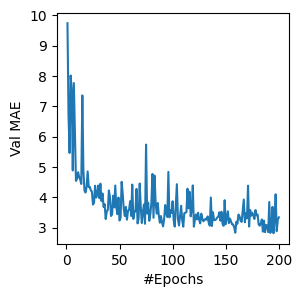

In [65]:
mae_range = range(1,1+len(avg_mae))
plt.figure(figsize=(3,3))
plt.plot(mae_range,avg_mae)
plt.xlabel("#Epochs")
plt.ylabel("Val MAE")
plt.show()

In [82]:
def SmoothCurves(points,factor=0.9):
        smoothed_points = []
        for point in points:
            if smoothed_points:
                previous = smoothed_points[-1]
                smoothed_points.append(previous * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        
        return smoothed_points


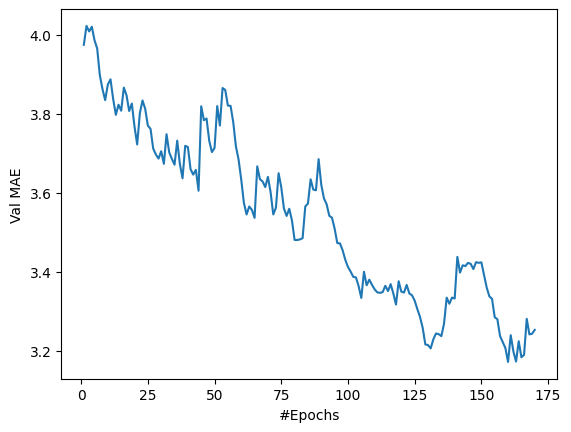

In [88]:
smth_mae_history = SmoothCurves(avg_mae[30:])
mae_range = range(1,1+len(smth_mae_history))
plt.plot(mae_range,smth_mae_history)
plt.xlabel("#Epochs")
plt.ylabel("Val MAE")
plt.show()

In [89]:
model = build()
model.fit(X_train,y_train,
          epochs=80,
          batch_size=16,
          )
 

Epoch 1/80
26/26 [==============================] - 1s 8ms/step - loss: 228.5411 - mae: 11.4709
Epoch 2/80
26/26 [==============================] - 0s 7ms/step - loss: 165.1667 - mae: 10.2592
Epoch 3/80
26/26 [==============================] - 0s 8ms/step - loss: 136.0715 - mae: 9.2251
Epoch 4/80
26/26 [==============================] - 0s 7ms/step - loss: 107.8543 - mae: 7.8885
Epoch 5/80
26/26 [==============================] - 0s 8ms/step - loss: 119.7768 - mae: 8.2141
Epoch 6/80
26/26 [==============================] - 0s 9ms/step - loss: 126.4725 - mae: 8.8054
Epoch 7/80
26/26 [==============================] - 0s 8ms/step - loss: 94.3381 - mae: 7.1489
Epoch 8/80
26/26 [==============================] - 0s 7ms/step - loss: 109.1391 - mae: 8.2126
Epoch 9/80
26/26 [==============================] - 0s 11ms/step - loss: 112.5521 - mae: 8.2265
Epoch 10/80
26/26 [==============================] - 0s 6ms/step - loss: 108.8191 - mae: 7.9634
Epoch 11/80
26/26 [============================